In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
k_val=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pre=model.predict(x_test)
    k_val.append(model.score(x_test,y_test))

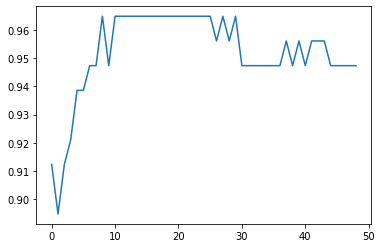

In [14]:
plt.plot(k_val)

In [15]:
clf=KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9649122807017544

In [35]:
from collections import Counter 
def classifier(x_train,y_train,x_test,k):
    dis=[]
    for i in range(len(x_train)):
        way=((x_train[i,:]-x_test)**2).sum()
        dis.append([way,i])
        dis=sorted(dis)
    targt=[]
    for n in range(k):
        index=y_train[dis[n][1]]
        targt.append(index)
        result=Counter(targt).most_common(1)[0][0]
    return result
        
        
        

In [36]:
classifier(x_train,y_train,x_test,15)

1

In [40]:
def predict(x_train,y_train,x_test_data,k):
    prediction=[]
    for i in x_test_data:
        prediction.append(classifier(x_train,y_train,i,k=15))
    return prediction


In [41]:
y_p=predict(x_train,y_train,x_test,15)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_p)

0.9649122807017544